In [2]:
import pandas as pd
digits = pd.read_csv("C:/AA/kaggle/mminst/train.csv")

In [3]:
digits.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Convert dataframe to numpy array

In [6]:
import numpy as np
targets = np.asarray(digits['label'])
data = np.asarray(digits.ix[:, digits.columns != 'label'])

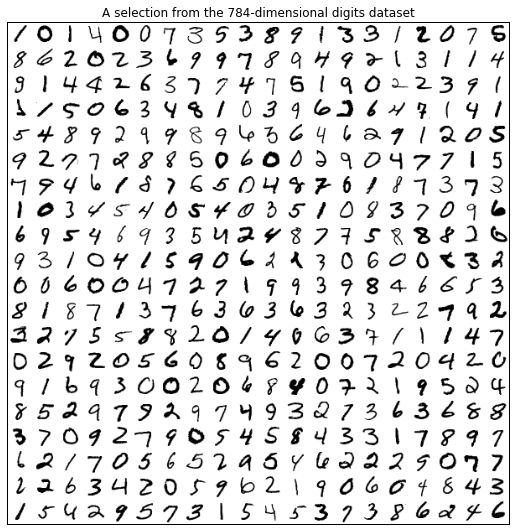

In [7]:
from time import time
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble, lda,
                     random_projection)

n_samples, n_features = data.shape

##Plot digits
def plot_digits(data, d=28, offset=2):
    n_img_per_row = 20
    s = d + offset
    img = np.zeros((s * n_img_per_row, s * n_img_per_row))

    for i in range(n_img_per_row):
        ix = s * i + 1
        for j in range(n_img_per_row):
            iy = s * j + 1
            img[ix:ix + d, iy:iy + d] = data[i * n_img_per_row + j].reshape((d, d))
            #print("shape: ", data[i * n_img_per_row + j].shape)
    plt.figure(figsize=(9,9))
    plt.imshow(img, cmap=plt.cm.binary)
    plt.xticks([])
    plt.yticks([])
    plt.title('A selection from the 784-dimensional digits dataset')

    

    
plot_digits(data)



In [12]:
#----------------------------------------------------------------------
# Scale and visualize the embedding vectors
def plot_embedding(X, target, d=28, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)
    y = target
    plt.figure(figsize=(12,12))
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(target[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(X.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                # don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(data[i].reshape((d,d)), cmap=plt.cm.gray_r),
                X[i])
            ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

Computing random projection


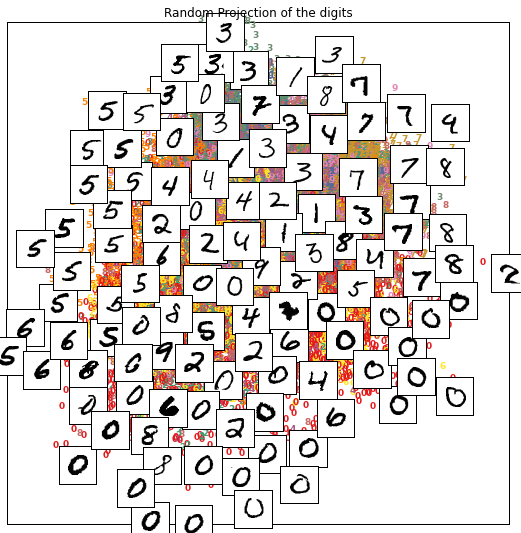

In [7]:
#----------------------------------------------------------------------
# Random 2D projection using a random unitary matrix
print("Computing random projection")
rp = random_projection.SparseRandomProjection(n_components=2, random_state=42)
X_projected = rp.fit_transform(data)
plot_embedding(X_projected,targets, 28, "Random Projection of the digits")

In [10]:
#----------------------------------------------------------------------
# t-SNE embedding of the digits dataset
print("Computing t-SNE embedding")
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
t0 = time()
X_tsne = tsne.fit_transform(data[0:2000])



Computing t-SNE embedding


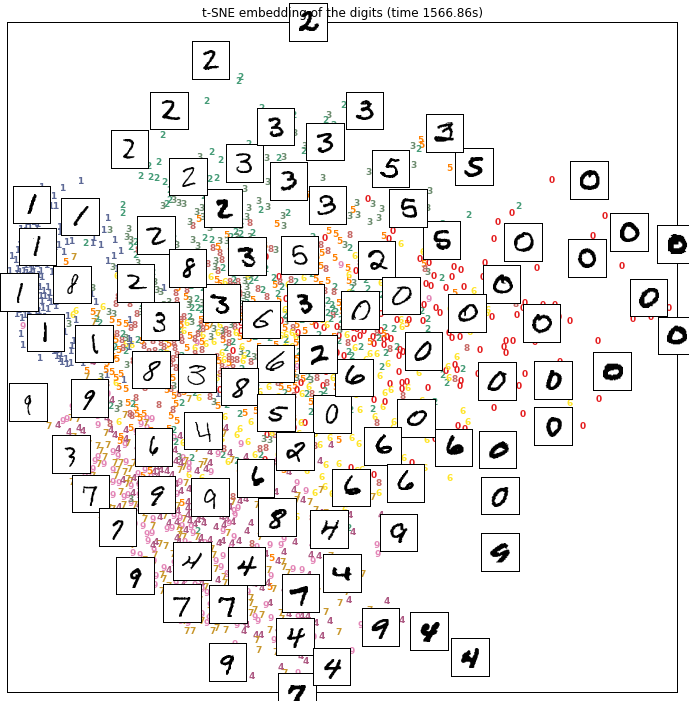

In [13]:
plot_embedding(X_tsne, targets[0:2000], 28,
               "t-SNE embedding of the digits (time %.2fs)" %
               (time() - t0))

In [1]:

digits.shape
data[1:2000].shape

NameError: name 'digits' is not defined